# 数据分析（进阶）项目二 data warangle
# 一、数据整理
## 1.1 数据收集

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import json
import requests
import os
%matplotlib inline

image-predictions.tsv，预测档案，  
tweet_json.txt，额外附加数据，转发数，喜欢数等  
twitter-archive-enhanced.csv，推特档案

In [2]:
respose = requests.get("https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv")

In [3]:
with open("image-predictions.tsv",mode='wb') as file:
    file.write(respose.content)

In [4]:
df_image = pd.read_csv("image-predictions.tsv",sep='\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
df_archive = pd.read_csv("twitter-archive-enhanced.csv")
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
with open('tweet_json.txt',encoding='utf-8') as file:  
    data =[]
    for line in file:
        a = json.loads(line)
        #print(line["retweet_count"],line.favorite_count)
        data_line = [a['id'],a['retweet_count'],a['favorite_count']]
        data.append(data_line)
    df_json = pd.DataFrame(data,columns=['id','retweet_count','favorite_count'])
    df_json.index=df_json.id
    df_json = df_json.drop(['id'],axis=1)

In [7]:
df_json.head()

,retweet_count,favorite_count
id,,
892420643555336193,8842,39492
892177421306343426,6480,33786
891815181378084864,4301,25445
891689557279858688,8925,42863
891327558926688256,9721,41016


## 1.2 数据评估
### 1.2.1 目测评估

In [8]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
#1 df_archive.timestamp时间戳为str格式
type(df_archive.timestamp[0])

str

1. tweet_id格式为int
2. timestamp格式为str
3. 存在181个转发的记录

### 2.2.2 编程评估

In [10]:
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [11]:
df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [12]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [13]:
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

#2  
“地位”几列（doggo,floofer,pupper,puppo）空缺数据以None填充

In [14]:
df_archive[df_archive.retweeted_status_id.isnull()==False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


#3  
存在181个转发的记录

In [15]:
df_archive['expanded_urls'].value_counts()[:5]

https://twitter.com/dog_rates/status/773308824254029826/photo/1    2
https://twitter.com/dog_rates/status/681694085539872773/photo/1    2
https://twitter.com/dog_rates/status/786963064373534720/photo/1    2
https://twitter.com/dog_rates/status/673295268553605120/photo/1    2
https://twitter.com/dog_rates/status/767754930266464257/photo/1    2
Name: expanded_urls, dtype: int64

In [16]:
df_archive[df_archive['expanded_urls']=='https://vine.co/v/ea0OwvPTx9l']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Vine will be deeply missed. This was by far my...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None


#4  
index=657和index=2212的expanded_url重复,两条为重复记录

In [17]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


rating_numerator大部分均略大于等于10，但存在异常值（最小为0分，最大1776分）  
rating_denominator大部分等于10，但存在异常值（最小为0分，最大170分）  

In [18]:
df_archive.name.value_counts()[:10]

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Penny       10
Tucker      10
Lola        10
Winston      9
Name: name, dtype: int64

#5  
name列存在数据缺失，填写为None或a的记录

In [19]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
pd.set_option('max_colwidth',200)
df_archive.query('rating_denominator!=10 | rating_numerator > 20')[['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,@markhoppus 182/10,182,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10


#6  评分问题  
index=313评分为：960/0  
index=340评分为75/10  
index=342评分为11/15  
index=433评分为84/70  
index=516的记录，24/7代表24小时7天    
index=695评分为75/10  
index=763评分为27/10  
index=784评分为9/11  
index=902评分为165/150  
index=1068评分为9/11  
index=1120评分为204/170  
index=1165评分为4/20  
index=1202评分为50/50  
index=1228评分为99/90  
index=1254评分为80/80  
index=1274评分为45/50  
index=1351评分为60/50  
index=1433评分为44/40  
index=1598评分为4/20  
index=1634评分为143/130  
index=1635评分为121/110  
index=1662评分为7/11  
index=1663评分为20/16  
index=1712评分为26/11  
index=1779评分为144/120  
index=1843评分为88/80  
index=2335评分为1/2  
index=188, 189, 290, 979, 2074的评分过大

In [22]:
df_archive[df_archive.rating_numerator == 960]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [23]:
df_archive[df_archive.rating_numerator == 960]['text'].values

array(["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"],
      dtype=object)

In [24]:
df_archive[df_archive.index==313][['rating_numerator','rating_denominator']]

,rating_numerator,rating_denominator
313,960,0


In [25]:
df_image.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

#7 部分图片不是狗狗照片

In [26]:
df_archive.source.head()[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [27]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [28]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
df_json.describe()

,retweet_count,favorite_count
count,2352.000000,2352.000000
mean,3134.932398,8109.198980
std,5237.846296,11980.795669
min,0.000000,0.000000
25%,618.000000,1417.000000
50%,1456.500000,3596.500000
75%,3628.750000,10118.000000
max,79116.000000,132318.000000


#8    
df_image共有2075条记录，df_archive和df均有2352记录。 
#9  
df_archive和评论点赞数的df在两个表中。  
#10  
“地位”（doggo,floofer,pupper,puppo）在不同列中。

### 1.2.3 评估结果
**质量问题**

- **df_archive**

 1. timestamp格式为str
 2. “地位”几列（doggo,floofer,pupper,puppo）空缺数据以None填充
 3. 存在181个转发的记录
 4. expanded_urls存在数据重复
 5. name列存在数据缺失，填写为None或a的记录
 6. 评分问题:

            index=313评分为：960/0  
            index=340评分为75/10  
            index=342评分为11/15  
            index=342评分为84/70  
            index=516的记录，24/7代表24小时7天    
            index=695评分为75/10  
            index=763评分为27/10  
            index=784评分为9/11  
            index=902评分为165/150  
            index=1068评分为9/11  
            index=1120评分为204/170  
            index=1165评分为4/20  
            index=1202评分为50/50  
            index=1228评分为99/90  
            index=1254评分为80/80  
            index=1274评分为45/50  
            index=1351评分为60/50  
            index=1433评分为44/40  
            index=1598评分为4/20  
            index=1634评分为143/130  
            index=1635评分为121/110  
            index=1662评分为7/11  
            index=1663评分为20/16  
            index=1712评分为26/11  
            index=1779评分为144/120  
            index=1843评分为88/80  
            index=2335评分为1/2  


- **df_image**

 7. 部分图片第一个识别项目预测不是狗狗照片
 8. df_image共有2075条记录，df_archive和df均有2352记录。

**结构问题**

9. df_archive和评论点赞数的df在两个表中
10. “地位”（doggo,floofer,pupper,puppo）在不同列中

In [30]:
#保存原始数据表
df_archive_orgin = df_archive.copy()
df_image_orgin = df_image.copy()
df_json_orgin = df_json.copy()

## 1.3 **清洗**

**质量问题**

**df_archive**






**df_image**



**结构问题**
9. 合并df_archive,df_image和df表


删除
#11
href = []
rel = []
source_text = []
for i in range(df_archive.shape[0]):
    href.append(df_archive.source[i][9:].split('" rel="')[0])
    rel.append(df_archive.source[i][9:].split('" rel="')[1].split('">')[0])
    source_text.append(df_archive.source[i].split('href="')[1].split('" rel="')[1].split('">')[1][:-4])
df_archive['href'] =href
df_archive['rel'] = rel
df_archive['source_text'] = source_text
df_archive = df_archive.drop(columns='source')

_定义_
1. 修改timestamp格式为timestamp

_编码_

In [31]:
df_archive.timestamp = pd.to_datetime(df_archive.timestamp)

_测试_

In [32]:
type(df_archive.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

In [33]:
df_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

_定义_  
2 “地位”几列（doggo,floofer,pupper,puppo）标记为None的内容以np.nan填充  
10 “地位”（doggo,floofer,pupper,puppo）内容合并到一列中

_编码_

In [34]:
df_archive[['doggo','floofer','pupper','puppo']] = df_archive[['doggo','floofer','pupper','puppo']].replace(['None'],'')

In [35]:
df_archive['degree'] = df_archive['doggo']+df_archive['floofer']+df_archive['pupper']+df_archive['puppo']

In [40]:
df_archive.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

In [36]:
df_archive['degree'].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: degree, dtype: int64

In [38]:
df_archive['degree'].replace(['','doggopupper','doggopuppo','doggofloofer'],[np.nan,'doggo,pupper','doggo,puppo','doggo,floofer'],inplace=True)

_测试_

In [39]:
df_archive['degree'].value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: degree, dtype: int64

_定义_
3. 删除181个转发的记录

_编码_

In [41]:
df_archive = df_archive[df_archive.retweeted_status_id.isnull()]

In [42]:
df_archive.drop(columns=['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

_定义_
4. 删除expanded_urls重复项中的时间较早的记录

_编码_

In [43]:
df_archive.drop(index=2212,inplace=True)

_测试_

In [44]:
df_archive['expanded_urls'].value_counts().head()

https://twitter.com/dog_rates/status/671896809300709376/photo/1    1
https://twitter.com/dog_rates/status/718939241951195136/photo/1    1
https://twitter.com/kaijohnson_19/status/883965650754039809        1
https://twitter.com/dog_rates/status/670408998013820928/photo/1    1
https://twitter.com/dog_rates/status/702932127499816960/photo/1    1
Name: expanded_urls, dtype: int64

_定义_
5. name列标记为None或a的内容以np.nan填充

_编码_

In [45]:
#df_archive.name = df_archive.name.replace(['None','a'],np.nan)
mask = (df_archive.name.str.islower())|(df_archive.name == 'None')|(df_archive.name == 'a')
df_archive.loc[mask, 'name'] = np.nan

_测试_

In [46]:
df_archive.name.value_counts().head()

Lucy       11
Charlie    11
Oliver     10
Cooper     10
Tucker      9
Name: name, dtype: int64

_定义_
6. 修改评分

    index=313评分修改为13/10  
    index=340评分修改为9.75/10  
    index=342评分缺失，删除此记录  
    index=433评分修改为12/10  
    index=516的评分缺失，删除此记录    
    index=695评分修改为9.75/10  
    index=763评分修改为11.27/10  
    index=784评分修改为14/10  
    index=902评分修改为11/10  
    index=1068评分修改为14/10  
    index=1120评分修改为12/10  
    index=1165评分修改为13/10  
    index=1202评分修改为10/10  
    index=1228评分修改为11/10  
    index=1254评分修改为10/10  
    index=1274评分修改为9/10  
    index=1351评分修改为12/10  
    index=1433评分修改为11/10  
    index=1598评分修改为2/10  
    index=1634评分修改为11/10  
    index=1635评分修改为11/10  
    index=1662评分修改为10/10  
    index=1663评分修改为12.5/10  
    index=1712评分修改为11.26/10  
    index=1779评分修改为12/10  
    index=1843评分修改为11/10   
    index=2335评分修改为5/10  

_编码_
index=342评分缺失，删除此记录  
index=516的评分缺失，删除此记录   
index=2335评分错误，删除此纪录  
index=188, 189, 290, 979, 2074的评分过大，删除此纪录。

In [47]:
text =[
"index=313评分修改为13/10",  
"index=340评分修改为9.75/10",  
"index=433评分修改为12/10",  
"index=695评分修改为9.75/10",  
"index=763评分修改为11.27/10",  
"index=784评分修改为14/10",  
"index=902评分修改为11/10",  
"index=1068评分修改为14/10",  
"index=1120评分修改为12/10",  
"index=1165评分修改为13/10",  
"index=1202评分修改为10/10",  
"index=1228评分修改为11/10",  
"index=1254评分修改为10/10",  
"index=1274评分修改为9/10",  
"index=1351评分修改为12/10",  
"index=1433评分修改为11/10",  
"index=1598评分修改为2/10",  
"index=1634评分修改为11/10",  
"index=1635评分修改为11/10",  
"index=1662评分修改为10/10",  
"index=1663评分修改为12.5/10",  
"index=1712评分修改为11.26/10",  
"index=1779评分修改为12/10",  
"index=1843评分修改为11/10"]

In [48]:
df_archive.drop(index=[342,516,188, 189, 290, 979, 2074,2335],inplace=True)

In [49]:
for i in text:
    ind = int(i.split("index=")[1].split("评分修改为")[0])
    fenzi = float(i.split("index=")[1].split("评分修改为")[1].split("/")[0])
    fenmu = float(i.split("index=")[1].split("评分修改为")[1].split("/")[1])
    if ind in df_archive.index:
        df_archive.loc[ind,['rating_numerator','rating_denominator']]=[fenzi,fenmu]

_测试_

In [50]:
pd.set_option('max_colwidth',200)
df_archive.query('rating_denominator!=10 | rating_numerator > 20')[['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator


_定义_
7. 删除第一个识别项目预测结果为非狗狗的记录

_编码_

In [51]:
df_image.drop(index = df_image[df_image['p1_dog']==False].index,inplace=True)
df_image.drop(columns='p1_dog',inplace=True)

_测试_

In [52]:
df_image.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


_定义_
8. 只保留df_archive和df中和df_image匹配的记录。

_编码_

In [53]:
df_image = df_image.iloc[:,:5]
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [54]:
df_image.shape

(1532, 5)

In [55]:
df_json.head()

,retweet_count,favorite_count
id,,
892420643555336193,8842,39492
892177421306343426,6480,33786
891815181378084864,4301,25445
891689557279858688,8925,42863
891327558926688256,9721,41016


In [56]:
df_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,degree
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN


In [57]:
df = df_archive.set_index('tweet_id').join(df_image.set_index('tweet_id'),how='inner').join(df_json)

_测试_

In [58]:
df.head(2)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,degree,jpg_url,img_num,p1,p1_conf,retweet_count,favorite_count
tweet_id,,,,,,,,,,,,,,,,
892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6480,33786
891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4301,25445


# 二、数据储存

In [59]:
df.to_csv('twitter_archive_master.csv')

# 三、分析和可视化

In [60]:
df.columns

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source',
       'text', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'degree', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'retweet_count', 'favorite_count'],
      dtype='object')

In [61]:
df.head(2)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,degree,jpg_url,img_num,p1,p1_conf,retweet_count,favorite_count
tweet_id,,,,,,,,,,,,,,,,
892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6480,33786
891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4301,25445


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1475 entries, 892177421306343426 to 666020888022790149
Data columns (total 16 columns):
in_reply_to_status_id    14 non-null float64
in_reply_to_user_id      14 non-null float64
timestamp                1475 non-null datetime64[ns]
source                   1475 non-null object
text                     1475 non-null object
expanded_urls            1475 non-null object
rating_numerator         1475 non-null float64
rating_denominator       1475 non-null float64
name                     1043 non-null object
degree                   228 non-null object
jpg_url                  1475 non-null object
img_num                  1475 non-null int64
p1                       1475 non-null object
p1_conf                  1475 non-null float64
retweet_count            1475 non-null int64
favorite_count           1475 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(7)
memory usage: 235.9+ KB


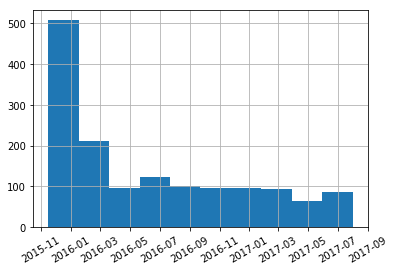

In [63]:
df.timestamp.hist(xrot=30)
plt.savefig("date_distributing.png")
plt.show()

整理后数据共计1994条记录，时间范围为2015年11月-2017年0月，其中主要集中在2015年11，12月。

In [64]:
df.describe()

,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num,p1_conf,retweet_count,favorite_count
count,1.400000e+01,1.400000e+01,1475.000000,1475.0,1475.000000,1475.000000,1475.000000,1475.000000
mean,6.950829e+17,4.196984e+09,10.925614,10.0,1.214237,0.614025,2789.628475,9303.914576
std,4.947686e+16,0.000000e+00,1.692136,0.0,0.575566,0.260355,4776.882360,12720.270943
min,6.671522e+17,4.196984e+09,2.000000,10.0,1.000000,0.044333,15.000000,81.000000
25%,6.724958e+17,4.196984e+09,10.000000,10.0,1.000000,0.391790,655.500000,2224.500000
50%,6.755284e+17,4.196984e+09,11.000000,10.0,1.000000,0.615678,1437.000000,4487.000000
75%,6.901517e+17,4.196984e+09,12.000000,10.0,1.000000,0.851069,3243.000000,11702.000000
max,8.558181e+17,4.196984e+09,14.000000,10.0,4.000000,0.999956,79116.000000,132318.000000


- 评分的分母（rating_denominator）均为10，评分的分子（rating_numerator）大多略大于10，平均分为10.92，可见作者总体对狗狗评分较高；  
- 大部分记录中只有一张照片，最高有4张照片；  
- 平均转发数为2787，平均点赞数为9295；  

In [65]:
df.name.value_counts()[:5]

Charlie    10
Cooper     10
Oliver      9
Tucker      8
Lucy        8
Name: name, dtype: int64

数量排名前五位的狗狗名字分别是：'Charlie', 'Cooper', 'Oliver', 'Tucker', 'Lucy'。

In [66]:
se_count_10 = df.p1.value_counts()[:10]

In [67]:
se_count = se_count_10.append(pd.Series(len(df.p1)-se_count_10.sum(), index=['others']))

In [68]:
se_count.index

Index(['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'pug', 'chow', 'Samoyed', 'Pomeranian', 'toy_poodle', 'malamute',
       'others'],
      dtype='object')

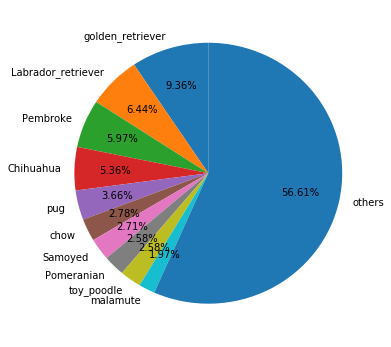

In [69]:
plt.figure(figsize=(6,6))
plt.pie(se_count,labels=se_count.index,startangle=90,radius=1,autopct='%3.2f%%',pctdistance = 0.7)
plt.savefig("se_count.png")
plt.show()

In [70]:
print("在所有的{}条记录中，狗狗品种共有{}".format(len(df.p1),len(df.p1.value_counts())),"种；\n其中排名前10位的狗狗品种",list(se_count_10.index),"的数量占狗狗总数量的{}%".format(round(se_count_10.sum()/len(df.p1)*100)))

在所有的1475条记录中，狗狗品种共有111 种；
其中排名前10位的狗狗品种 ['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua', 'pug', 'chow', 'Samoyed', 'Pomeranian', 'toy_poodle', 'malamute'] 的数量占狗狗总数量的43.0%


In [71]:
df_p1_10 = pd.DataFrame(df.p1.value_counts()[:10])

In [72]:
df_rating = df.groupby('p1').mean().loc[:,['rating_numerator','rating_denominator']]

In [73]:
df_rating.sort_values(by='rating_numerator',ascending=False)[:10]

,rating_numerator,rating_denominator
p1,,
Saluki,12.500000,10.0
briard,12.333333,10.0
Tibetan_mastiff,12.250000,10.0
Border_terrier,12.142857,10.0
silky_terrier,12.000000,10.0
standard_schnauzer,12.000000,10.0
giant_schnauzer,12.000000,10.0
Eskimo_dog,11.777778,10.0
Gordon_setter,11.750000,10.0


In [74]:
df_rating.sort_values(by='rating_numerator',ascending=False)[:10].index

Index(['Saluki', 'briard', 'Tibetan_mastiff', 'Border_terrier',
       'silky_terrier', 'standard_schnauzer', 'giant_schnauzer', 'Eskimo_dog',
       'Gordon_setter', 'Irish_setter'],
      dtype='object', name='p1')

- 评分最高的前10位的狗狗品种分别是：'clumber', 'soft-coated_wheaten_terrier', 'West_Highland_white_terrier','Great_Pyrenees', 'borzoi', 'Labrador_retriever', 'Siberian_husky','golden_retriever', 'Pomeranian', 'Saluki'

In [75]:
df_rating['ratio'] = pd.DataFrame(round(df['rating_numerator']/df['rating_denominator'],2))

In [76]:
df['ratio'] = pd.DataFrame(round(df['rating_numerator']/df['rating_denominator'],2))

In [77]:
df_ratio = pd.DataFrame(df.apply(lambda x:x['rating_numerator']/x['rating_denominator'],axis=1))

In [78]:
df_rating['ratio'] = df.groupby('p1').mean().loc[:,'ratio']

In [79]:
df_rating.sort_values(by='ratio',ascending=False)[:10].join(df.p1.value_counts())

,rating_numerator,rating_denominator,ratio,p1
p1,,,,
Saluki,12.500000,10.0,1.250000,4
briard,12.333333,10.0,1.233333,3
Tibetan_mastiff,12.250000,10.0,1.225000,4
Border_terrier,12.142857,10.0,1.214286,7
silky_terrier,12.000000,10.0,1.200000,1
giant_schnauzer,12.000000,10.0,1.200000,3
standard_schnauzer,12.000000,10.0,1.200000,1
Eskimo_dog,11.777778,10.0,1.177778,18
Gordon_setter,11.750000,10.0,1.175000,4


- 作者平均评分最高的一只狗狗品种是Saluki。

In [80]:
df.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,degree,jpg_url,img_num,p1,p1_conf,retweet_count,favorite_count,ratio
tweet_id,,,,,,,,,,,,,,,,,
892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6480,33786,1.3
891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4301,25445,1.2
891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,9721,41016,1.2
891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,3240,20548,1.3
890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,2142,12053,1.3


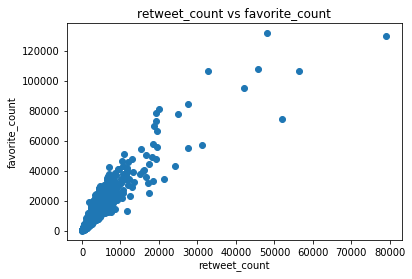

In [81]:
plt.scatter(df.retweet_count,df.favorite_count)
plt.title("retweet_count vs favorite_count")
plt.xlabel("retweet_count")
plt.ylabel("favorite_count")
plt.savefig("retweet_coun_favorite_count.png")
plt.show()

- retweet_count和favorite_count呈现正相关性

In [82]:
df_retweet_rating = pd.DataFrame(df.groupby('p1').mean()['retweet_count']).join(pd.DataFrame(df.groupby('p1').mean()['rating_numerator']))

In [83]:
df_retweet_rating.head()

,retweet_count,rating_numerator
p1,,
Afghan_hound,5946.000000,9.666667
Airedale,1387.000000,9.833333
American_Staffordshire_terrier,2193.461538,11.000000
Appenzeller,1449.000000,11.000000
Australian_terrier,3058.500000,11.500000


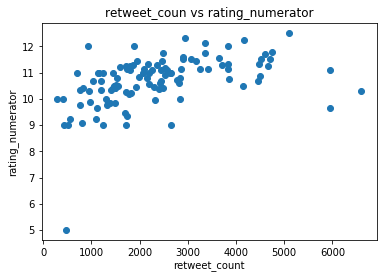

In [84]:
plt.scatter(df_retweet_rating.retweet_count,df_retweet_rating.rating_numerator)
plt.title("retweet_coun vs rating_numerator")
plt.xlabel("retweet_count")
plt.ylabel("rating_numerator")
plt.savefig("retweet_coun_rating_numerator.png")
plt.show()

转发数和评分的相关性不大。